In [1]:
!nvidia-smi

Fri Dec  4 01:34:14 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.80.02    Driver Version: 450.80.02    CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-DGXS...  On   | 00000000:07:00.0  On |                    0 |
| N/A   49C    P0    57W / 300W |    829MiB / 32505MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-DGXS...  On   | 00000000:08:00.0 Off |                    0 |
| N/A   

In [2]:
print('loading train...', flush=True, end='')

# x를 loading해서 (batch_size, step, channel)
input_path = 'dataset/preprocess4/input2/'
x_train = np.load(input_path+'x_train.npz', allow_pickle=True)['arr_0']
x_test = np.load(input_path+'x_test.npz', allow_pickle=True)['arr_0']
x_val = np.load(input_path+'x_val.npz', allow_pickle=True)['arr_0']
y_train = np.load(input_path+'y_train.npz')['arr_0']
y_test = np.load(input_path+'y_test.npz')['arr_0']
y_val = np.load(input_path+'y_val.npz')['arr_0']


loading train...

In [47]:
import matplotlib.pyplot as plt
from pptx import Presentation # 라이브러리 
from pptx.util import Inches # 사진, 표등을 그리기 위해
import random, os


prs = Presentation() # 파워포인트 객체 선언


# 제목 슬라이드
title_slide_layout = prs.slide_layouts[0]  # 슬라이드 종류 선택
slide = prs.slides.add_slide(title_slide_layout) # 슬라이드 추가

# 제목 - 제목에 값넣기
title = slide.placeholders[0] # 제목
title.text = "train set - pacu" # 제목에 값 넣기

# 부제목
subtitle = slide.placeholders[1] # 제목상자는 placeholders[0], 부제목상자는 [1]
subtitle.text = input_path 



for nrs in range(0,10):
    print('saving NRS {}...'.format(nrs), flush=True, end='')
    for i in range(0, 10):
        print('{}..'.format(i), end='')
        title_slide_layout = prs.slide_layouts[6]  # 슬라이드 종류 선택 - https://python-pptx.readthedocs.io/en/latest/user/slides.html
        slide = prs.slides.add_slide(title_slide_layout) # 슬라이드 추가

        switch = True
        while switch:
            if nrs == 0:
                idx = random.randint(63256, 74636)
            else:
                idx = random.randint(0,63256)
            if y_train[idx] == nrs:
                switch = False

                
        # plotting PPG, ECG
        fig, ax = plt.subplots(2,1, figsize=(10,8))

        # PPG
        ax[0].plot(x_train[idx,:,0])
        ax[0].set_ylim(-40,40)
        ax[0].set_title('PPG: NRS {}, idx {}'.format(y_train[idx], idx), fontsize=15)

        # ECG
        ax[1].plot(x_train[idx,:,1])
        ax[1].set_ylim(-10,10)
        ax[1].set_title('ECG: NRS {}, idx {}'.format(y_train[idx], idx), fontsize=15)


        fname = '{}_ex.png'.format(i)
        fig.savefig(fname)
        plt.close()

        pic = slide.shapes.add_picture(fname, Inches(0), Inches(0))

        os.remove(fname)
    print('done')
    
prs.save('train_pacu_input-output2.pptx')

saving NRS 0...0..1..2..3..4..5..6..7..8..9..done
saving NRS 1...0..1..2..3..4..5..6..7..8..9..done
saving NRS 2...0..1..2..3..4..5..6..7..8..9..done
saving NRS 3...0..1..2..3..4..5..6..7..8..9..done
saving NRS 4...0..1..2..3..4..5..6..7..8..9..done
saving NRS 5...0..1..2..3..4..5..6..7..8..9..done
saving NRS 6...0..1..2..3..4..5..6..7..8..9..done
saving NRS 7...0..1..2..3..4..5..6..7..8..9..done
saving NRS 8...0..1..2..3..4..5..6..7..8..9..done
saving NRS 9...0..1..2..3..4..5..6..7..8..9..done


In [ ]:
### style 1
    # plotting PPG, ECG
        fig, ax = plt.subplots(1,2, figsize=(10,5))

        # PPG
        ax[0].plot(x_train[idx,:,0])
        ax[0].set_ylim(-40,40)
        ax[0].set_title('PPG: NRS {}, idx {}'.format(y_train[idx], idx), fontsize=20)

        # ECG
        ax[1].plot(x_train[idx,:,1])
        ax[1].set_ylim(-10,10)
        ax[1].set_title('ECG: NRS {}, idx {}'.format(y_train[idx], idx), fontsize=20)


18425


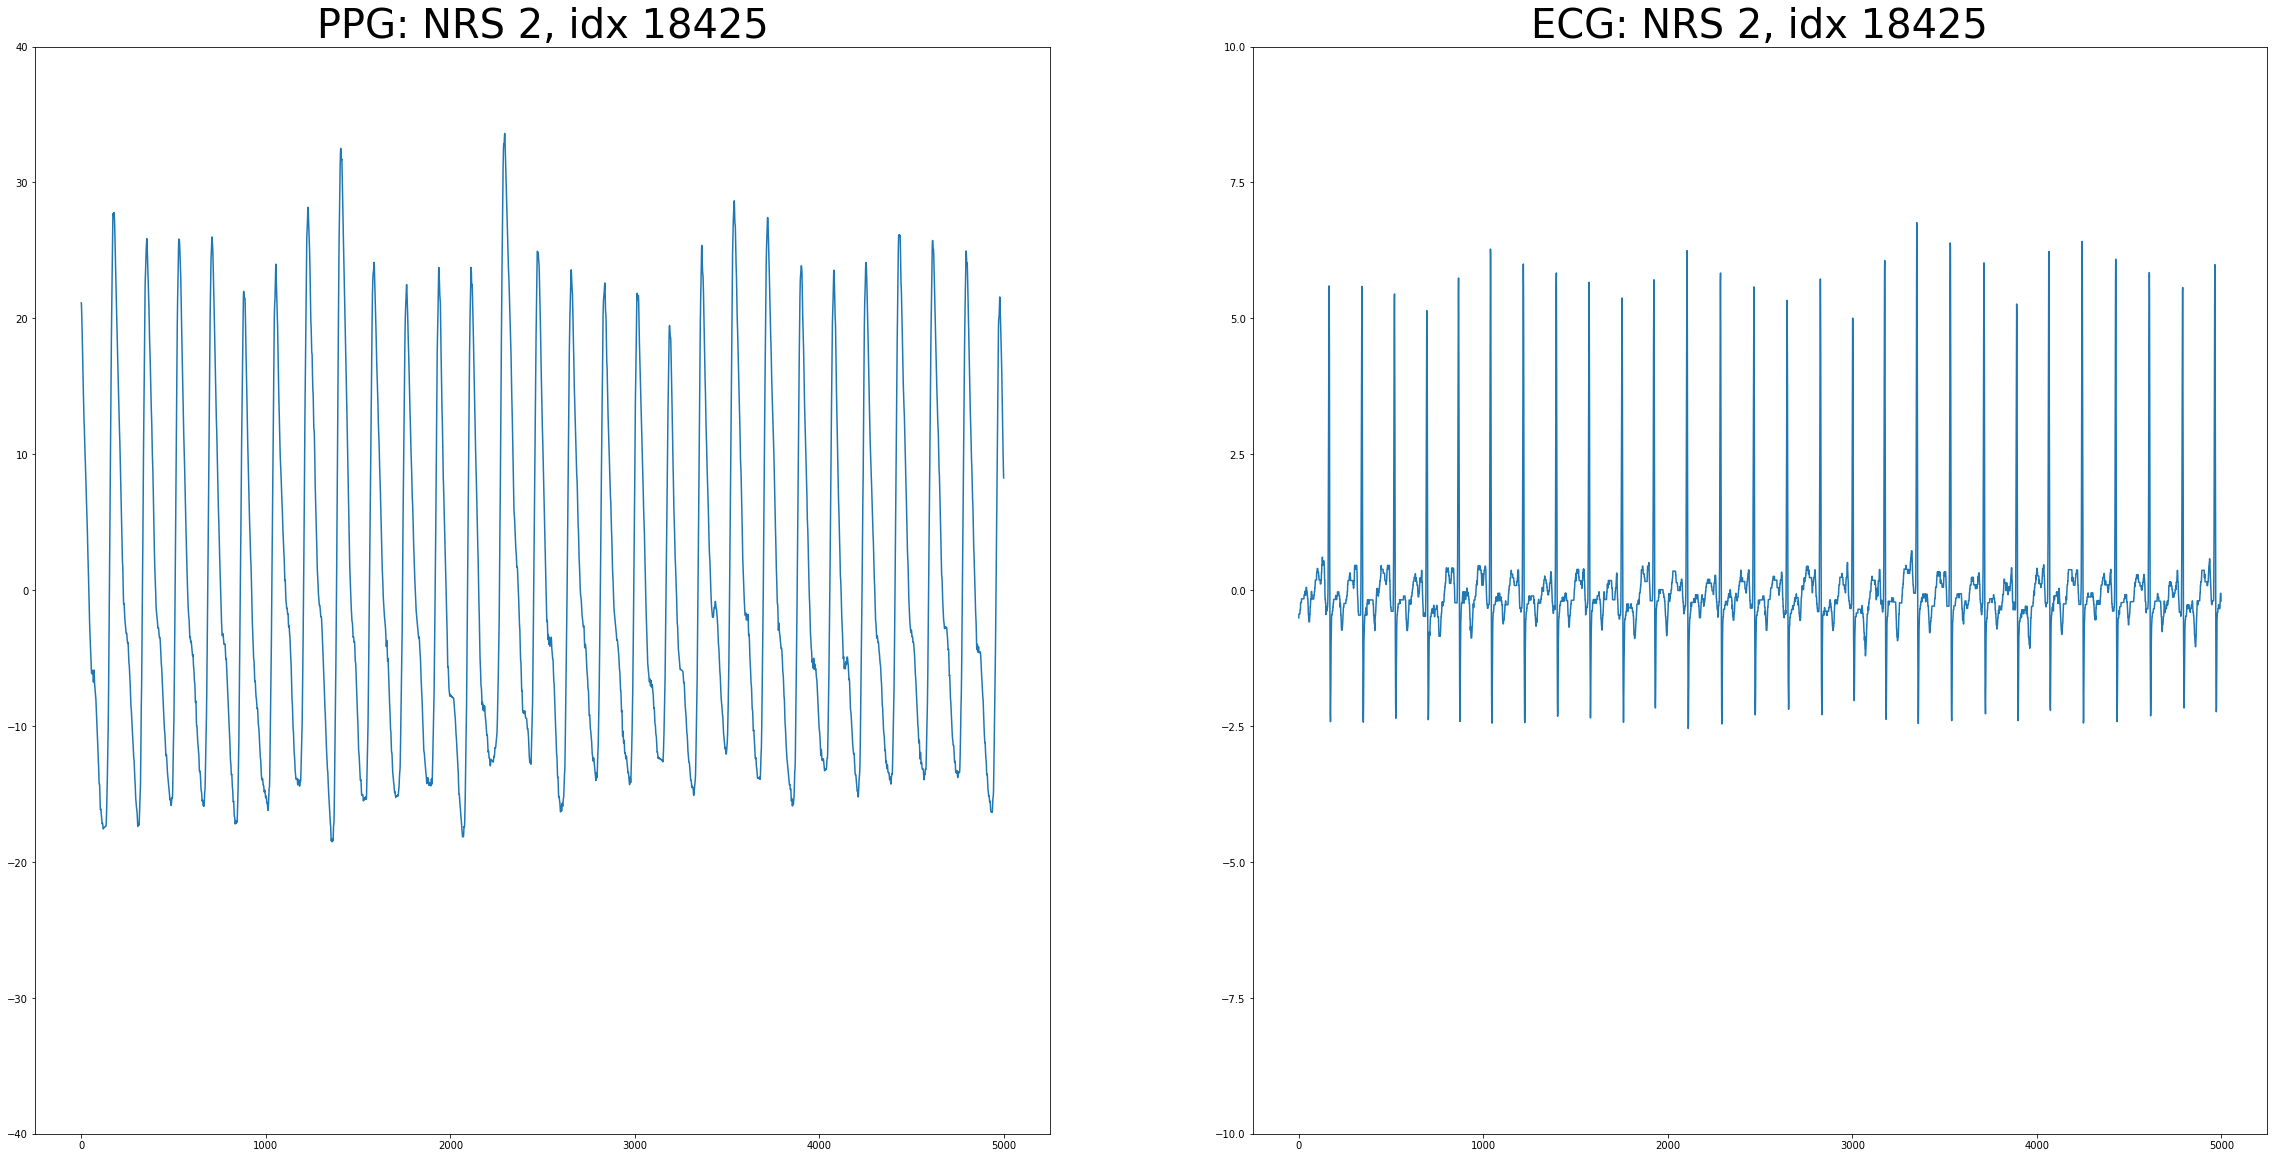

In [32]:
import random

idx = random.randint(0,63256)
print(idx)

fig, ax = plt.subplots(1,2, figsize=(40,20))

# PPG
ax[0].plot(x_train[idx,:,0])
ax[0].set_ylim(-40,40)
ax[0].set_title('PPG: NRS {}, idx {}'.format(y_train[idx], idx), fontsize=40)

# ECG
ax[1].plot(x_train[idx,:,1])
ax[1].set_ylim(-10,10)
ax[1].set_title('ECG: NRS {}, idx {}'.format(y_train[idx], idx), fontsize=40)
fig.savefig('asdf.png')